# Phase 3: Asking meaningful questions that need to be answered

Cài đặt thêm thư viện ipynb để có thể import các variable từ các file notebook khác

In [194]:
! pip install ipynb

In [195]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')
sys.path.insert(0, '../phase_2_data_exploration')

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
%store -r df_titles
%store -r df_credits

df_titles = df_titles
df_credits = df_credits

In [198]:
df_titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy
1,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action
2,tm82253,The Best Years of Our Lives,MOVIE,1946,NONE,171,"romance, war, drama",US,0.0,tt0036868,8.1,63026.0,8.435,7.8,US,romance
3,tm83884,His Girl Friday,MOVIE,1940,NONE,92,"comedy, drama, romance",US,0.0,tt0032599,7.8,57835.0,11.270,7.4,US,comedy
4,tm56584,In a Lonely Place,MOVIE,1950,NONE,94,"thriller, drama, romance",US,0.0,tt0042593,7.9,30924.0,8.273,7.6,US,thriller


In [199]:
df_credits.head()

,id,name,character,role
0,ts20945,Joe Besser,Joe,ACTOR
1,ts20945,Moe Howard,Moe,ACTOR
2,ts20945,Larry Fine,Larry,ACTOR
3,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [200]:
df_data = df_titles.merge(df_credits, on='id', how='inner')
df_data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Marion Mack,Annabelle Lee,ACTOR


### 1. What are top 10 movies/shows released in last 10 years received most IMDB votes?

In [235]:
movie_show_votes = df_data[df_data['release_year'] >= 2012].loc[:, ['id', 'title', 'type', 'release_year', 'imdb_votes']].drop_duplicates().dropna().reset_index(drop=True)
movie_show_votes.head()

,id,title,type,release_year,imdb_votes
0,ts27630,Line of Duty,SHOW,2012,55784.0
1,tm61801,Zero Dark Thirty,MOVIE,2012,291985.0
2,tm61801,Zero Dark Thirty,MOVIE,2012,296416.0
3,tm72846,Skyfall,MOVIE,2012,684779.0
4,tm69294,Prometheus,MOVIE,2012,598691.0


In [236]:
movie_votes = movie_show_votes[movie_show_votes['type']=='MOVIE']
show_votes = movie_show_votes[movie_show_votes['type']=='SHOW']

In [237]:
movie_votes_table = pd.pivot_table(movie_votes, values='imdb_votes', index='title', aggfunc=np.mean)
top10_movie_votes = movie_votes_table.nlargest(n=10, columns='imdb_votes')
top10_movie_votes

,imdb_votes
title,
The Dark Knight Rises,1669067.0
Django Unchained,1472668.0
Joker,1190053.0
The Hobbit: An Unexpected Journey,803665.0
The Imitation Game,756254.0
Man of Steel,753688.0
Skyfall,684779.0
12 Years a Slave,678847.0
Batman v Superman: Dawn of Justice,677372.0


<AxesSubplot:title={'center':'Top 10 popular shows'}, ylabel='title'>

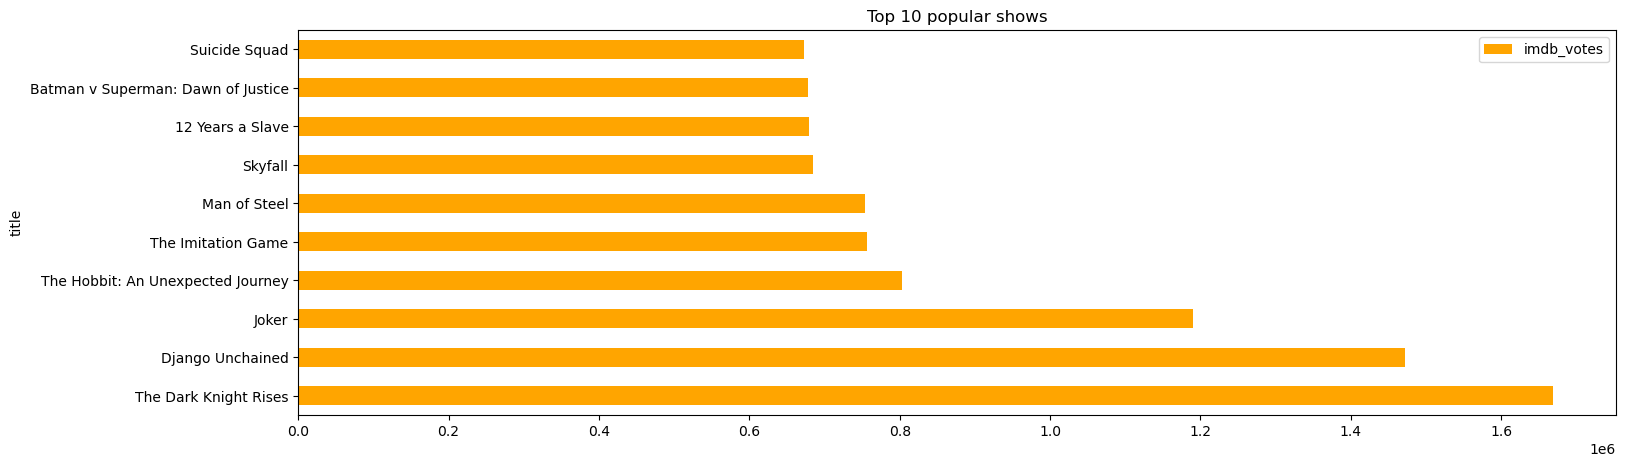

In [249]:
top10_movie_votes.plot.barh(figsize=(17, 5), color='orange', title='Top 10 popular shows')

In [239]:
show_votes_table = pd.pivot_table(show_votes, values='imdb_votes', index='title', aggfunc=np.mean)
top10_show_votes = show_votes_table.nlargest(n=10, columns='imdb_votes')
top10_show_votes

,imdb_votes
title,
Stranger Things,1101055.0
Chernobyl,693955.0
True Detective,546443.0
Peaky Blinders,511668.0
Vikings,508388.0
House of Cards,497650.0
Westworld,474807.0
Rick and Morty,473951.0
The Witcher,472202.0


<AxesSubplot:title={'center':'Top 10 popular shows'}, ylabel='title'>

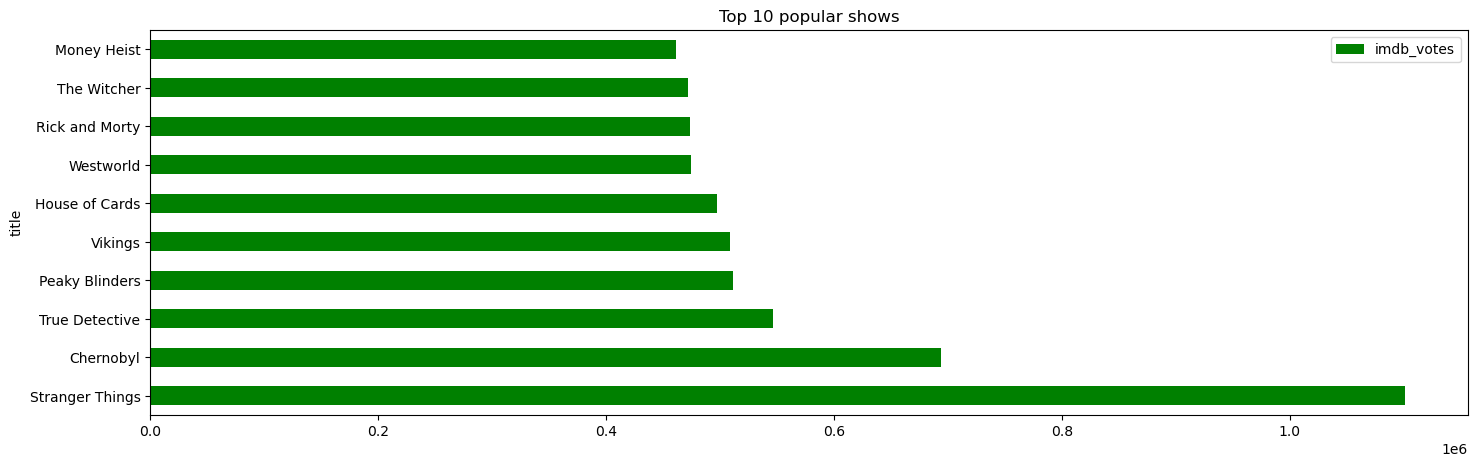

In [248]:
top10_show_votes.plot.barh(figsize=(17, 5), color='green', title='Top 10 popular shows')

### 2. What are top 10 popular movies/shows (tmdb popularity) released in last 10 years?

In [218]:
movie_show_popularity = df_data[df_data['release_year'] >= 2012].loc[:, ['id', 'title', 'type', 'release_year', 'tmdb_popularity']].drop_duplicates().dropna().reset_index(drop=True)
movie_show_popularity.head()

,id,title,type,release_year,tmdb_popularity
0,ts27630,Line of Duty,SHOW,2012,52.202
1,tm61801,Zero Dark Thirty,MOVIE,2012,17.200
2,tm61801,Zero Dark Thirty,MOVIE,2012,24.241
3,tm72846,Skyfall,MOVIE,2012,62.264
4,tm69294,Prometheus,MOVIE,2012,86.605


In [202]:
movie_popularity = movie_show_popularity[movie_show_popularity['type']=='MOVIE']
movie_popularity.head()

,id,title,type,release_year,tmdb_popularity
1,tm61801,Zero Dark Thirty,MOVIE,2012,17.200
2,tm61801,Zero Dark Thirty,MOVIE,2012,24.241
3,tm72846,Skyfall,MOVIE,2012,62.264
4,tm69294,Prometheus,MOVIE,2012,86.605
5,tm53381,Jack Reacher,MOVIE,2012,122.196


In [203]:
movie_popularity['id'].duplicated().sum()

60

In [204]:
show_popularity = movie_show_popularity[movie_show_popularity['type']=='SHOW']
show_popularity.head()

,id,title,type,release_year,tmdb_popularity
0,ts27630,Line of Duty,SHOW,2012,52.202
6,ts20436,Key & Peele,SHOW,2012,16.505
9,ts2405,Daniel Tiger's Neighborhood,SHOW,2012,10.179
15,ts20388,Psycho-Pass,SHOW,2012,36.480
16,ts14643,Catfish: The TV Show,SHOW,2012,30.930


In [205]:
show_popularity['id'].duplicated().sum()

17

In [240]:
movie_popularity_table = pd.pivot_table(movie_popularity, values='tmdb_popularity', index='title', aggfunc=np.mean)
top10_movie_popularity = movie_popularity_table.nlargest(n=10, columns='tmdb_popularity')
top10_movie_popularity

,tmdb_popularity
title,
The Batman,4447.894
Incantation,2274.044
The Sea Beast,1723.363
Valley of the Dead,1668.296
The Man from Toronto,1439.906
All the Old Knives,1437.906
Collision,1194.149
Spiderhead,996.869
The eighth clause,950.986


<AxesSubplot:title={'center':'Top 10 popular movies'}, ylabel='title'>

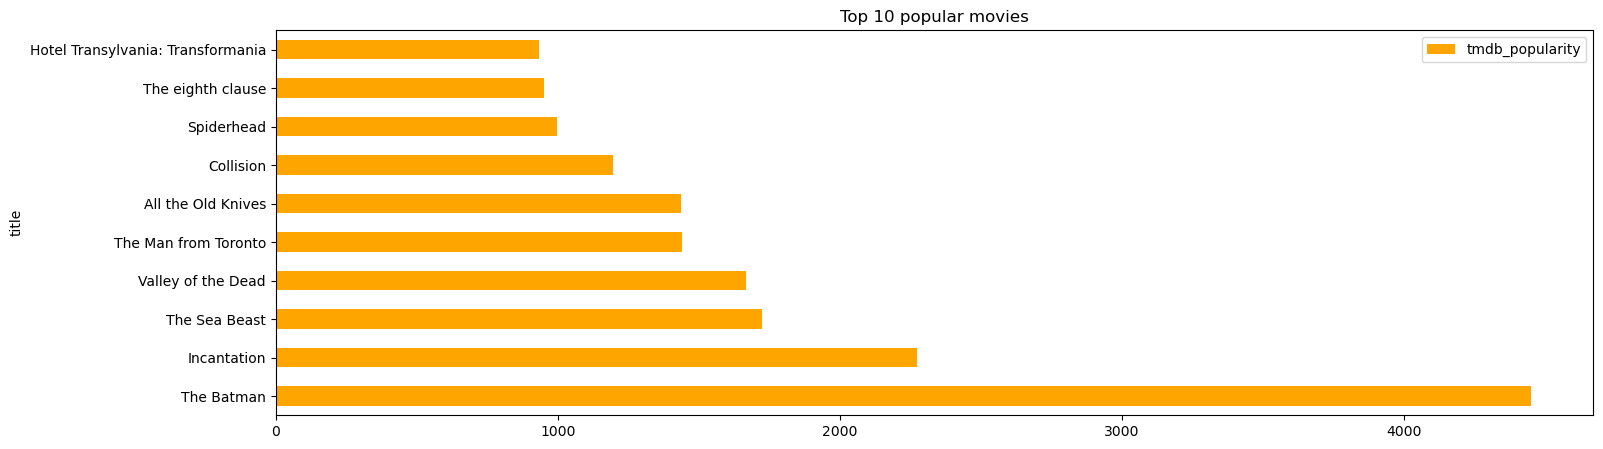

In [250]:
top10_movie_popularity.plot.barh(figsize=(17, 5), color='orange', title='Top 10 popular movies')

In [242]:
show_popularity_table = pd.pivot_table(show_popularity, values='tmdb_popularity', index='title', aggfunc=np.mean)
top10_show_popularity = show_popularity_table.nlargest(n=10, columns='tmdb_popularity')
top10_show_popularity

,tmdb_popularity
title,
Stranger Things,2226.231
Resident Evil,1387.392
Peaky Blinders,1038.077
Harina,951.863
Lucifer,922.112
Money Heist (Korean Remake),904.326
The Baby,757.816
Money Heist: From Tokyo to Berlin,712.899
Kung Fu Panda: The Dragon Knight,656.832


<AxesSubplot:title={'center':'Top 10 popular shows'}, ylabel='title'>

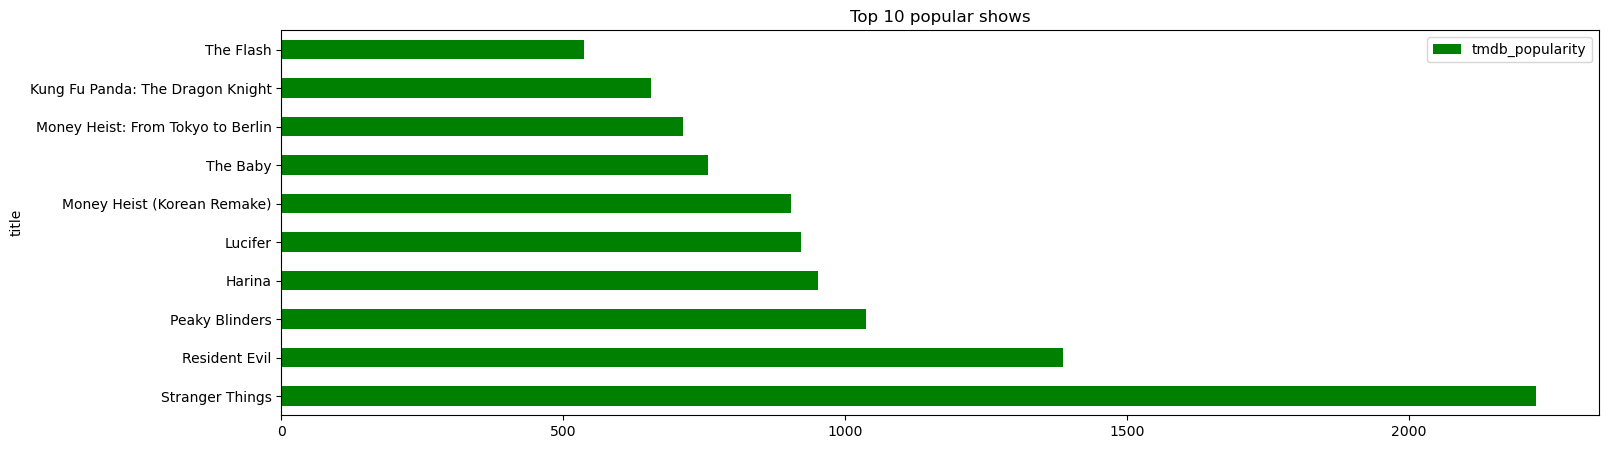

In [252]:
top10_show_popularity.plot.barh(figsize=(17, 5), color='green', title='Top 10 popular shows')

### 3. Which genres have the highest ratings (based on imdb & tmdb score) released in last 10 years?

In [253]:
genre_score = df_data[df_data['release_year'] >= 2012].loc[:, ['genres', 'imdb_score', 'tmdb_score']].drop_duplicates().dropna().reset_index(drop=True)
genre_score = genre_score[genre_score['genres'] != '']
genre_score['genres'].update(genre_score['genres'].str.split(', '))
genre_score = genre_score.explode('genres').dropna().reset_index(drop=True)
genre_score.head()

,genres,imdb_score,tmdb_score
0,crime,8.7,8.2
1,thriller,8.7,8.2
2,drama,8.7,8.2
3,european,8.7,8.2
4,drama,7.4,7.0


In [254]:
genre_score['avg_score'] = genre_score.loc[:, ['imdb_score', 'tmdb_score']].mean(axis=1)
genre_score.head()

,genres,imdb_score,tmdb_score,avg_score
0,crime,8.7,8.2,8.45
1,thriller,8.7,8.2,8.45
2,drama,8.7,8.2,8.45
3,european,8.7,8.2,8.45
4,drama,7.4,7.0,7.20


In [255]:
genre_score_table = pd.pivot_table(genre_score, values='avg_score', index='genres', aggfunc={'genres':'count', 'avg_score': np.mean})
genre_score_table = genre_score_table.rename(columns={'genres': 'occurences'})
genre_score_table.sort_values(by=['avg_score', 'occurences'])

,avg_score,occurences
genres,,
horror,5.555409,890
thriller,6.108896,2183
western,6.129154,78
comedy,6.308370,3184
action,6.332825,1741
romance,6.346638,1469
european,6.417286,742
scifi,6.432426,917
family,6.512234,851


<AxesSubplot:ylabel='genres'>

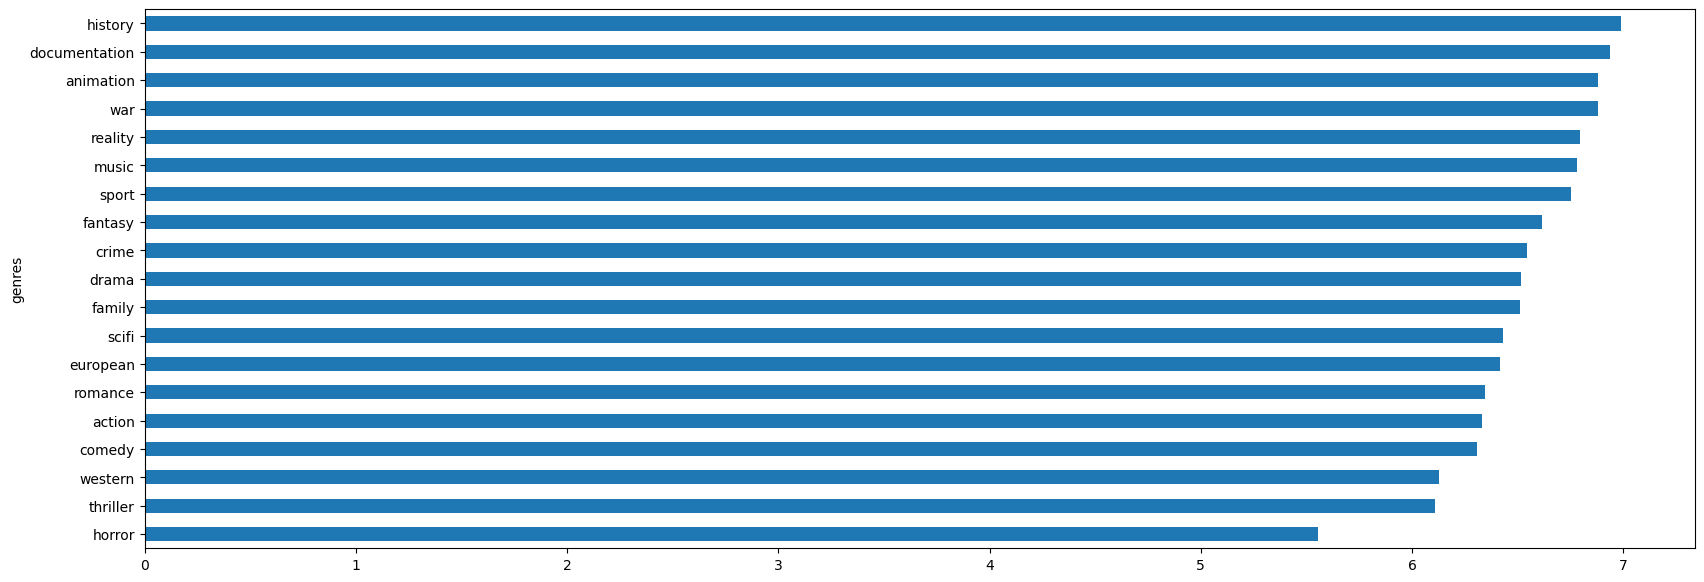

In [256]:
genre_score_table['avg_score'].sort_values().plot.barh(figsize=(20, 7))

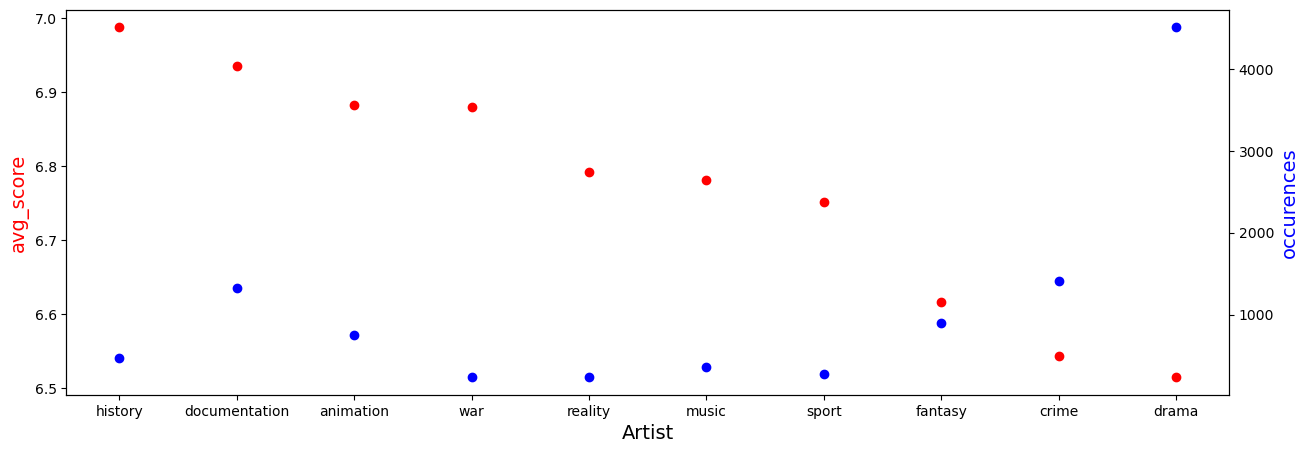

In [257]:
plotdata = genre_score_table.nlargest(n=10, columns=['avg_score', 'occurences'])

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(plotdata.index, plotdata['avg_score'], color="red", marker='o')
ax.set_xlabel("Artist", fontsize = 14)
ax.set_ylabel("avg_score", color="red", fontsize=14)

ax2=ax.twinx()
ax2.scatter(plotdata.index, plotdata['occurences'], color="blue", marker='o')
ax2.set_ylabel("occurences", color="blue", fontsize=14)
plt.show()

In [214]:
def MinMaxScaler1_10(s):
    return (9*(s - s.min()))/(s.max()-s.min()) + 1

In [215]:
genre_score_table['occurences'] = MinMaxScaler1_10(genre_score_table['occurences'])
genre_score_table['avg_score'] = MinMaxScaler1_10(genre_score_table['avg_score'])
genre_score_table = genre_score_table.rename(columns={'occurences': 'occurences_scaled'})
genre_score_table.round(2)

,avg_score,occurences_scaled
genres,,
action,5.88,4.38
animation,9.34,2.38
comedy,5.73,7.31
crime,7.21,3.70
documentation,9.67,3.54
drama,7.03,10.00
european,6.41,2.35
family,7.01,2.57
fantasy,7.66,2.67


In [216]:
genre_score_table['rating'] = np.sqrt(genre_score_table['occurences_scaled'] * genre_score_table['avg_score'])
genre_score_table['rating'] = MinMaxScaler1_10(genre_score_table['rating'])
genre_score_table.sort_values(by='rating').round(2)

,avg_score,occurences_scaled,rating
genres,,,
horror,1.00,2.65,1.00
western,4.60,1.00,1.69
reality,8.77,1.32,3.37
sport,8.52,1.41,3.45
war,9.33,1.34,3.53
music,8.70,1.57,3.75
european,6.41,2.35,4.00
scifi,6.51,2.70,4.42
history,10.00,1.79,4.47


<AxesSubplot:ylabel='genres'>

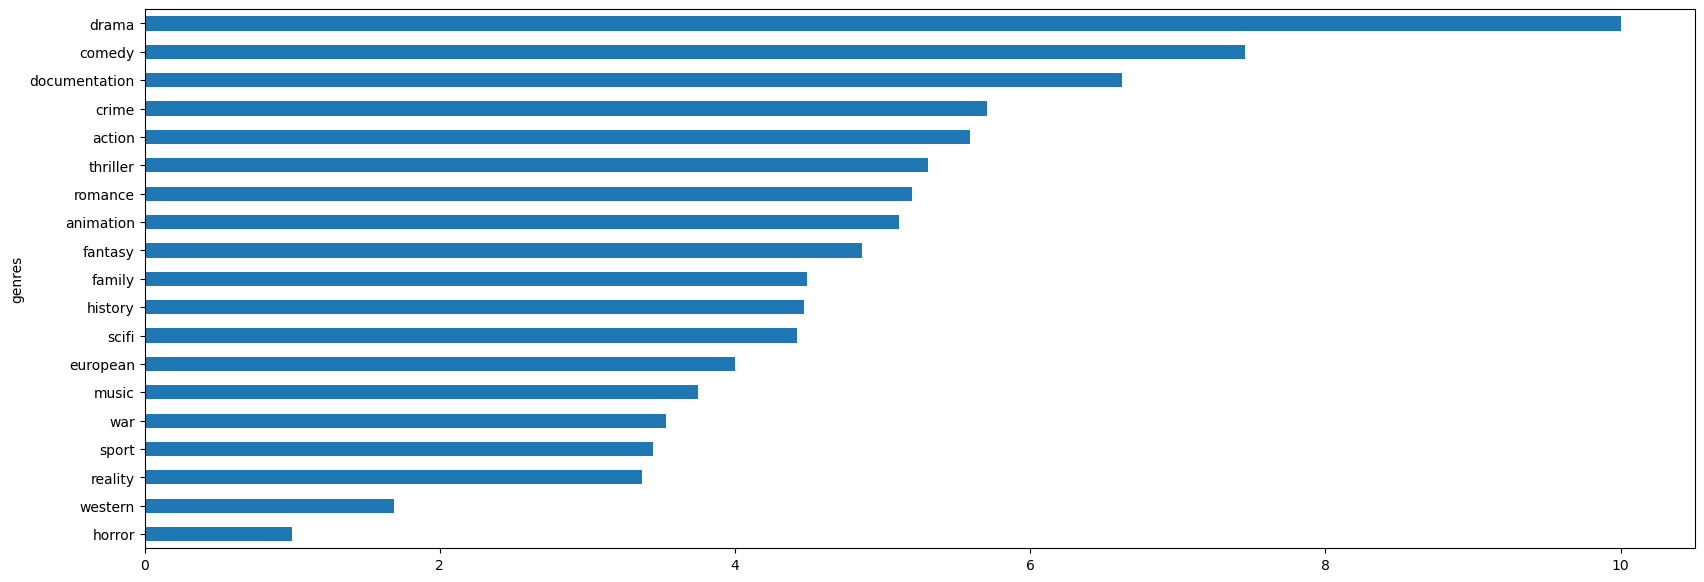

In [217]:
genre_score_table['rating'].sort_values().plot.barh(figsize=(20, 7))

Question 2: 